# NOTE ON JUPYTER NOTEBOOKS
    
For reasons that are detailed in the root README.md, I'm using Cauldron notebooks in this project to display meaningful results - any Jupyter notebooks are just exploratory chicken scratches.

If you want to see meaningful outputs, you have three easy options:
- Option 1: check within this directory for a folder called 'html' - within that directory will be an html file where you can see all the visuals.
- Option 2: go to http://unnotebook.com/reader-install/ and install the reader, and point it to the EDA.cauldron file in this directory. The install is actually fast and easy, and the visuals look the best in this format.
- Option 3: check this directory for a pdf that I've printed from the Cauldron notebook. This is just visuals without code, and the visuals aren't as good as the other two options.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from tqdm import tqdm

%matplotlib inline
#%matplotlib notebook

Questions to answer:
- What's the deal with promo2?

In [2]:
df = pd.read_csv('../../data/processed/wrangled_dataframe.csv', header=0, low_memory=False)

In [3]:
dfex = df[:100]
dfex.head()

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
0,1,HE,2013-01-01,8,6,3,6,3,1,93,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
1,56,HE,2013-01-01,8,6,3,6,3,1,93,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2,69,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
3,77,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
4,111,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


In [4]:
di = df.copy()
di['date'] = pd.to_datetime(di.date)
di['week_start'] = pd.to_datetime(di.week_start)
di.set_index('date', inplace=True)

In [5]:
diex = di.copy()
diex = diex[:100]
diex.sort_index(inplace=True)
diex.head()

,store,state,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,HE,8,6,3,6,3,1,93,80,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,56,HE,8,6,3,6,3,1,93,80,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,69,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,77,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,111,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


In [6]:
df['sales'].describe()

count    1.050330e+06
mean     5.591748e+03
std      3.920795e+03
min      0.000000e+00
25%      3.411000e+03
50%      5.628000e+03
75%      7.769000e+03
max      4.155100e+04
Name: sales, dtype: float64

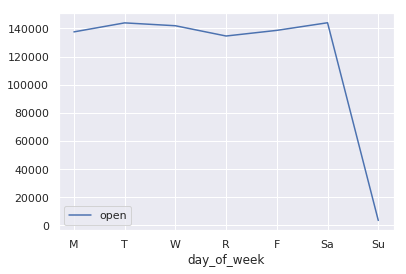

In [7]:
ax = df[['day_of_week', 'open']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

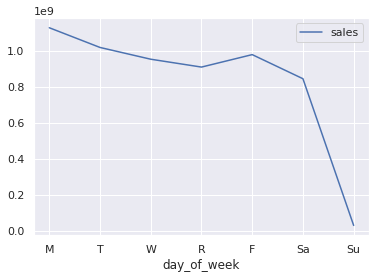

In [8]:
ax = df[['day_of_week', 'sales']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

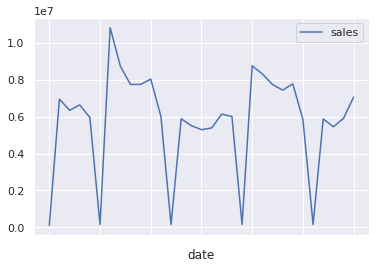

In [9]:
# df[['date', 'sales']].groupby('date').sum().plot()
ax = df.loc[(df.date >= '2013-01-01') & (df.date <= '2013-01-31'), ['date', 'sales']].groupby('date').sum().plot()
#ax.set_xticklabels(pd.date_range('2013-01-06', '2013-01-31'), rotation=60)
#ax.set(xticklabels=pd.date_range('2013-01-06', '2013-01-31'), rotation=60)
#df[['date', 'sales']].groupby('date').resample('BA').sum().plot()

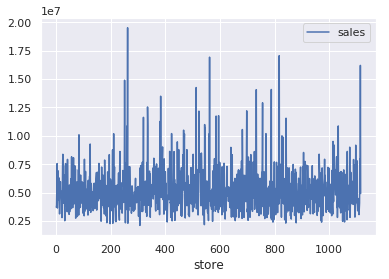

In [10]:
df[['store', 'sales']].groupby('store').sum().plot()

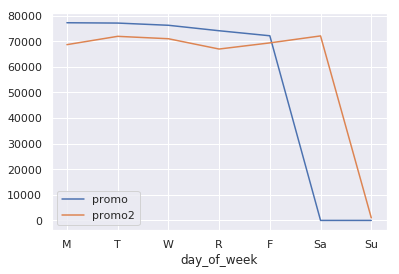

In [11]:
ax = df[['day_of_week', 'promo', 'promo2']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);
#ax = df.loc[df.open == 1, ['day_of_week', 'promo', 'promo2']].groupby('day_of_week').sum().plot()
#ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

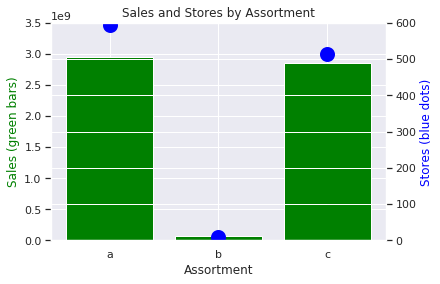

In [12]:
total_sales_by_assortment = df[['sales', 'assortment']].groupby('assortment').sum()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_assortment.index,
         height=np.array(total_sales_by_assortment['sales']).reshape(3,), color='green')
ax_l.set_ylim([0, 3.5e9])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'assortment']].groupby('assortment').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 600])

ax_l.set_title('Sales and Stores by Assortment')
ax_l.set_ylabel('Sales (green bars)', color='green')
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Assortment');

# 9 stores have assortment 'b', while 593 have 'a' and 513 have 'c'
#len(df[df.assortment == 'b'])/942 # 9
#len(df[df.assortment == 'a'])/942 # 593
#len(df[df.assortment == 'c'])/942 # 513

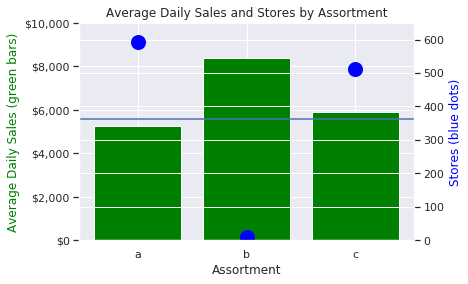

In [13]:
total_sales_by_assortment = df[['sales', 'assortment']].groupby('assortment').sum()
store_counts_by_assortment = (df[['store', 'assortment']].groupby('assortment').count().values/942).reshape(3,)
avg_daily_sales_by_assortment = \
    np.array(total_sales_by_assortment['sales']).reshape(3,) / (store_counts_by_assortment * 942)
avg_daily_sales_by_assortment

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_assortment.index,
         height=avg_daily_sales_by_assortment, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'assortment']].groupby('assortment').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_l.set_title('Average Daily Sales and Stores by Assortment')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Assortment')
ax_l.axhline(df.sales.mean());

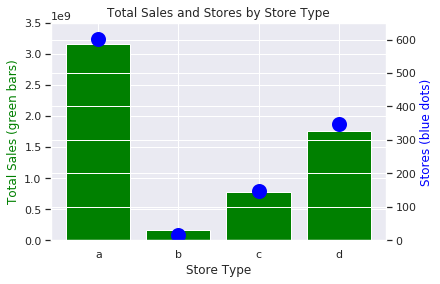

In [14]:
sales_by_store_type = df[['sales', 'store', 'store_type']].groupby('store_type').sum()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=sales_by_store_type.index, height=sales_by_store_type['sales'], color='green')
ax_l.set_ylim([0, 3.5e9])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'store_type']].groupby('store_type').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_r.set_title('Total Sales and Stores by Store Type')
ax_l.set_ylabel('Total Sales (green bars)', color='green')
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Store Type');

# 17 stores have store_type 'b' and 148 stores have store_type 'c', while 602 have 'a' and 348 have 'd'
# len(df[df.store_type == 'b'])/942 # 17
# len(df[df.store_type == 'a'])/942 # 602
# len(df[df.store_type == 'c'])/942 # 148
# len(df[df.store_type == 'd'])/942 # 348

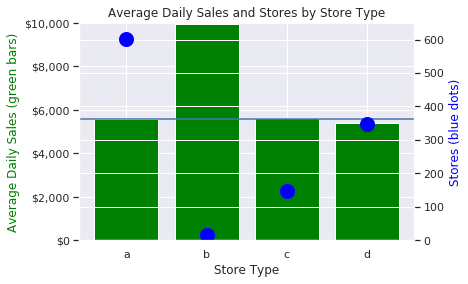

In [15]:
total_sales_by_store_type = df.groupby('store_type').sales.sum()
store_days_by_store_type = (df.groupby('store_type').store.count().values).reshape(4,)
avg_daily_sales_by_store_type = \
    np.array(total_sales_by_store_type).reshape(4,) / store_days_by_store_type
avg_daily_sales_by_store_type

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_store_type.index,
         height=avg_daily_sales_by_store_type, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(store_days_by_store_type/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_l.set_title('Average Daily Sales and Stores by Store Type')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
ax_l.axhline(df.sales.mean());

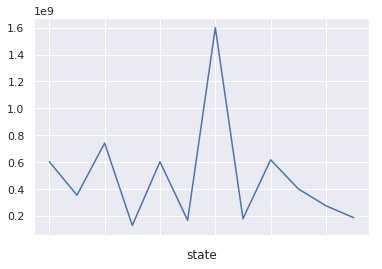

In [16]:
ax = df.groupby('state').sales.sum().plot()
ax.set_xlabel = df['state'].unique()

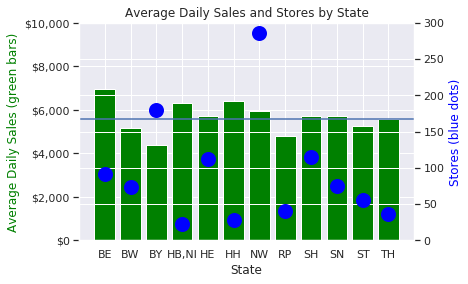

In [17]:
total_sales_by_state = df[['sales', 'state']].groupby('state').sum()
store_counts_by_state = (df[['store', 'state']].groupby('state').count().values/942).reshape(12,)
avg_daily_sales_by_state = \
    np.array(total_sales_by_state['sales']).reshape(12,) / (store_counts_by_state * 942)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_state.index,
         height=avg_daily_sales_by_state, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'state']].groupby('state').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 300])

ax_l.set_title('Average Daily Sales and Stores by State')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('State')
ax_l.axhline(df.sales.mean());

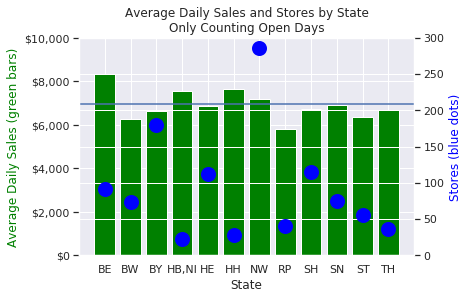

In [18]:
# Same chart as above but restricted only to open stores
open = df[df.open == 1]
total_sales_by_state = open[['sales', 'state']].groupby('state').sum()
store_counts_by_state = (open[['store', 'state']].groupby('state').count().values/942).reshape(12,)
avg_daily_sales_by_state = \
    np.array(total_sales_by_state['sales']).reshape(12,) / (store_counts_by_state * 942)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_state.index,
         height=avg_daily_sales_by_state, color='green')
ax_l.set_ylim([0, 10000])
# Note that here we're plotting by df (including days closed) rather than 'open' because each store may be open 
# less than 942 days - the variable being plotted is a basic store count, not store*days, so I just used df
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'state']].groupby('state').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 300])

ax_l.set_title('Average Daily Sales and Stores by State\nOnly Counting Open Days')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('State')
ax_l.axhline(open.sales.mean());

In [19]:
#open.store.nunique()
#len(df) # 1050330
#len(open) # 844340
#len(df) - len(open) # 205990
#open.date.nunique() # 942
#df.date.nunique() # 942

942

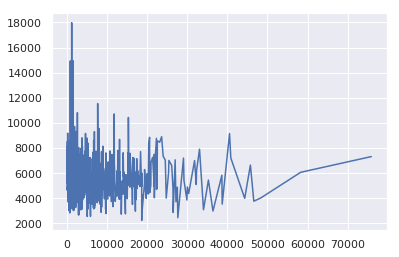

In [54]:
# No relationship between daily avg sales and nearest competition
total_sales_by_competition_distance = \
    np.array(df[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(df[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((df[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

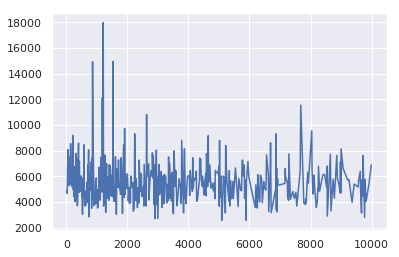

In [55]:
# No relationship between daily avg sales and nearest competition - even for <10km
u10 = df[df.competition_distance <= 10000]
total_sales_by_competition_distance = \
    np.array(u10[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(u10[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((u10[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

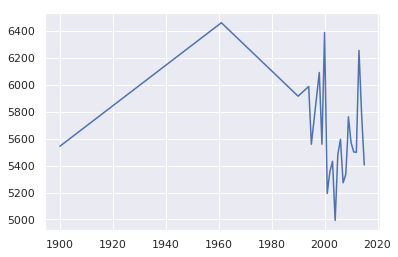

In [56]:
# Weird chart but looks like a rough correlation since 2000
total_sales_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

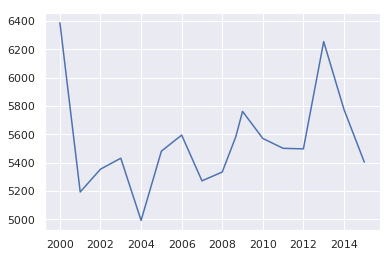

In [57]:
# Rough correlation since 2000 - check the store counts
s2000 = df[df.competition_open_since_year >= 2000]
total_sales_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

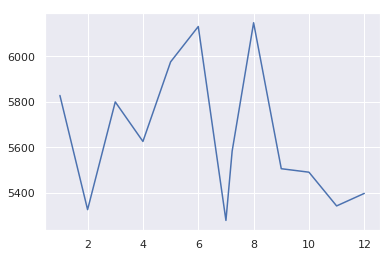

In [58]:
# Should be no correlation between which month the competition opened and avg sales
total_sales_by_competition_open_since_month = \
    np.array(df[['competition_open_since_month', 'sales']].groupby('competition_open_since_month').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_month = \
    np.array(df[['competition_open_since_month', 'store']].groupby('competition_open_since_month').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_month = \
    total_sales_by_competition_open_since_month / (store_counts_by_competition_open_since_month * 942)
xs = np.array((df[['competition_open_since_month', 'sales']].groupby('competition_open_since_month').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_month);

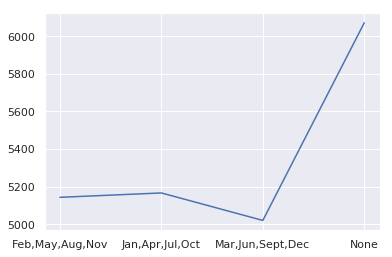

In [59]:
# At first glance, little difference between PromoInterval avg store sales
total_sales_by_promo_interval = \
    np.array(df[['promo_interval', 'sales']].groupby('promo_interval').sum()[['sales']]).reshape(-1)
store_counts_by_promo_interval = \
    np.array(df[['promo_interval', 'store']].groupby('promo_interval').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_promo_interval = \
    total_sales_by_promo_interval / (store_counts_by_promo_interval * 942)
xs = np.array((df[['promo_interval', 'sales']].groupby('promo_interval').sum()).index)
plt.plot(xs, avg_daily_sales_by_promo_interval);

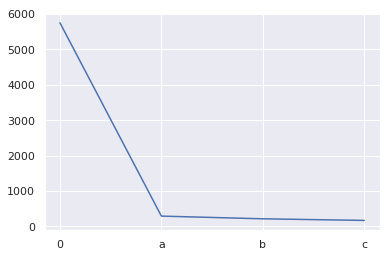

In [60]:
# Hardly anything gets sold on a state holiday - check that this is accurate if used
total_sales_by_state_holiday = \
    np.array(df[['state_holiday', 'sales']].groupby('state_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_state_holiday = \
    np.array(df[['state_holiday', 'store']].groupby('state_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_state_holiday = \
    total_sales_by_state_holiday / (store_counts_by_state_holiday)
xs = np.array((df[['state_holiday', 'sales']].groupby('state_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_state_holiday);

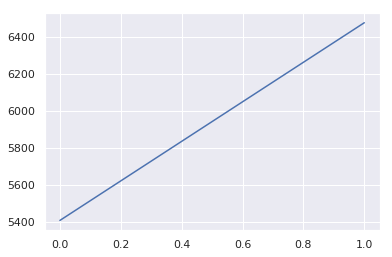

In [61]:
# School holidays are good for business - check that this is accurate if used
total_sales_by_school_holiday = \
    np.array(df[['school_holiday', 'sales']].groupby('school_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_school_holiday = \
    np.array(df[['school_holiday', 'store']].groupby('school_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_school_holiday = \
    total_sales_by_school_holiday / (store_counts_by_school_holiday)
xs = np.array((df[['school_holiday', 'sales']].groupby('school_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_school_holiday);

0.9008549279208763

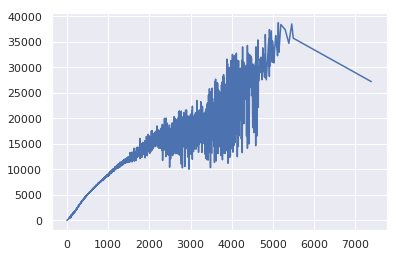

In [62]:
# Sales are highly correlated with # of customers
total_sales_by_customers = \
    np.array(df[['customers', 'sales']].groupby('customers').sum()[['sales']]).reshape(-1)
store_counts_by_customers = \
    np.array(df[['customers', 'store']].groupby('customers').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_customers = \
    total_sales_by_customers / (store_counts_by_customers * 942)
xs = np.array((df[['customers', 'sales']].groupby('customers').sum()).index)
plt.plot(xs, avg_daily_sales_by_customers);
df['sales'].corr(df['customers'])

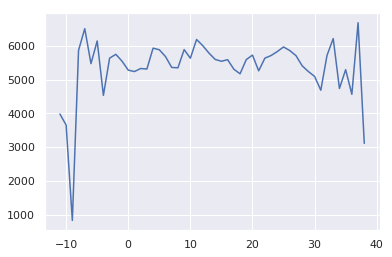

In [63]:
# Except at extreme temperatures, not much correlation between max_temperature_c and sales
total_sales_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'store']].groupby('max_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_max_temperature_c = \
    total_sales_by_max_temperature_c / (store_counts_by_max_temperature_c * 942)
xs = np.array((df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_max_temperature_c);

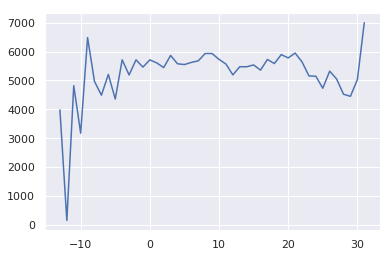

In [64]:
# Except at extreme temperatures, not much correlation between mean_temperature_c and sales
total_sales_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'store']].groupby('mean_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_mean_temperature_c = \
    total_sales_by_mean_temperature_c / (store_counts_by_mean_temperature_c * 942)
xs = np.array((df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_mean_temperature_c);

In [65]:
df.groupby('events').count()['store'].sort_values()
df.sales.mean()

5591.74794873992

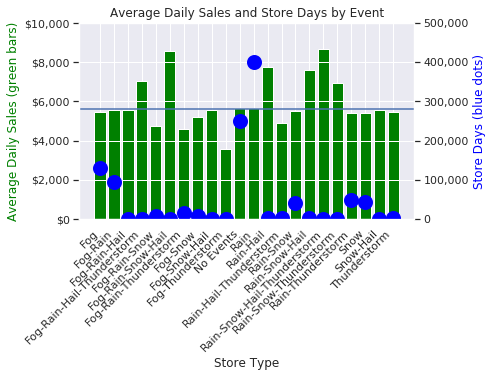

In [66]:
total_sales_by_events = \
    np.array(df[['events', 'sales']].groupby('events').sum()[['sales']]).reshape(-1)
store_counts_by_events = \
    np.array(df[['events', 'store']].groupby('events').count()[['store']]).reshape(-1)
avg_daily_sales_by_events = \
    total_sales_by_events / store_counts_by_events
xs = np.array((df[['events', 'sales']].groupby('events').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_events, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(xs, store_counts_by_events, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 500000])

ax_l.set_title('Average Daily Sales and Store Days by Event')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(df.sales.mean());

In [67]:
#len(df[(df.promo == 1) & (df.open == 0)]) # 11203, before the merge_dfs function was changed
#len(df[(df.promo == 1) & (df.sales == 0)]) # 11205, before the merge_dfs function was changed
#(df[(df.promo == 1) & (df.sales == 0)]).head()
#len(df[(df.promo2 == 1) & (df.open == 0)]) # 116835
#(df[(df.promo2 == 1) & (df.open == 0)]).head()
#len(df[(df.promo == 1) & (df.open == 0)]) # 0
len(df[(df.promo == 1) & (df.sales == 0) & (df.open == 1)]) # 2
#(df[(df.promo == 1) & (df.sales == 0) & (df.open == 1)]) 
len(df[(df.promo2 == 1) & (df.open == 0)]) # 0
len(df[(df.promo2 == 1) & (df.sales == 0) & (df.open == 1)]) # 1
(df[(df.promo == 1) & (df.customers <= 100) & (df.open == 1)]).sort_values('customers')

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
277836,1100,NW,2014-04-29,14,12,11,13,12,11,96,...,"Jan,Apr,Jul,Oct",1,0.0,3.0,1.0,1.0,0,0.0,77,2014-04-27
873140,948,BW,2013-04-25,24,16,7,9,7,4,87,...,None,3,0.0,5.0,1.0,1.0,0,0.0,69,2013-04-21
507039,1093,SN,2013-06-03,11,9,7,10,8,7,100,...,None,0,133.0,18.0,1.0,1.0,0,0.0,45,2013-06-02
1030592,175,HH,2013-08-26,23,17,12,11,9,5,88,...,None,0,316.0,44.0,1.0,1.0,0,0.0,73,2013-08-25
996073,151,ST,2014-03-21,21,14,5,8,5,3,84,...,None,4,775.0,68.0,1.0,1.0,0,0.0,72,2014-03-16
43107,942,HE,2014-01-20,4,2,-1,4,3,-1,100,...,"Jan,Apr,Jul,Oct",0,1333.0,94.0,1.0,1.0,0,0.0,63,2014-01-19
424433,609,BE,2013-06-19,33,26,18,20,17,14,78,...,None,2,760.0,97.0,1.0,1.0,0,1.0,71,2013-06-16


In [68]:
open = df[df.open == 1]
non_promo_sales_by_state = open.loc[open.promo == 0, ['sales', 'state']].groupby('state').sum()
non_promo_store_sales_days_by_state = \
    (open.loc[open.promo == 0, ['store', 'state']].groupby('state').count().values).reshape(12,)
promo_sales_by_state = open.loc[open.promo == 1, ['sales', 'state']].groupby('state').sum()
promo_store_sales_days_by_state = \
    (open.loc[open.promo == 1, ['store', 'state']].groupby('state').count().values).reshape(12,)
avg_daily_non_promo_sales_by_state = non_promo_sales_by_state['sales'].values/non_promo_store_sales_days_by_state
avg_daily_non_promo_sales_by_state = non_promo_sales_by_state['sales'].values/non_promo_store_sales_days_by_state


avg_daily_non_promo_sales_by_state
open.loc[df.promo == 0, 'sales'].mean()

5929.826183034807

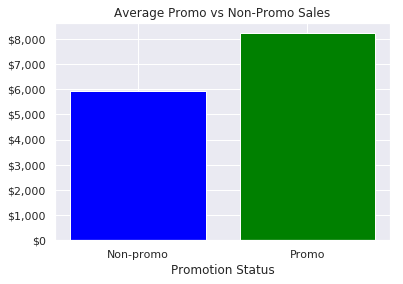

In [69]:
# Promo vs non-promo sales by state
open = df[df.open == 1]

avg_promo_sales = open.loc[open.promo == 1, 'sales'].mean()
avg_non_promo_sales = open.loc[open.promo == 0, 'sales'].mean()

fig, ax = plt.subplots()

ax.bar(x=['Non-promo', 'Promo'],
       height=[avg_non_promo_sales, avg_promo_sales], color=['blue', 'green'])
ax_l.set_ylim([0, 10000])

ax.set_title('Average Promo vs Non-Promo Sales')
ax_l.set_ylabel('Avg Daily Sales')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('Promotion Status');

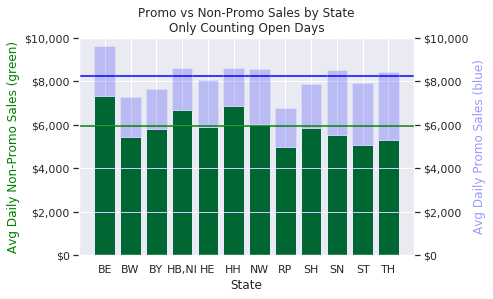

In [70]:
# Promo vs non-promo sales by state
open = df[df.open == 1]
non_promo_sales_by_state = open.loc[open.promo == 0, ['sales', 'state']].groupby('state').sum()
non_promo_store_sales_days_by_state = \
    (open.loc[open.promo == 0, ['store', 'state']].groupby('state').count().values).reshape(12,)
avg_daily_non_promo_sales_by_state = (non_promo_sales_by_state['sales'].values)/non_promo_store_sales_days_by_state
avg_daily_promo_sales = open.loc[df.promo == 1, 'sales'].mean()

promo_sales_by_state = open.loc[open.promo == 1, ['sales', 'state']].groupby('state').sum()
promo_store_sales_days_by_state = \
    (open.loc[open.promo == 1, ['store', 'state']].groupby('state').count().values).reshape(12,)
avg_daily_promo_sales_by_state = promo_sales_by_state['sales'].values/promo_store_sales_days_by_state
avg_daily_non_promo_sales = open.loc[df.promo == 0, 'sales'].mean()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=non_promo_sales_by_state.index,
         height=avg_daily_non_promo_sales_by_state, color='green')#, alpha=0.6)
ax_l.set_ylim([0, 10000])
ax_r.bar(x=promo_sales_by_state.index, height=avg_daily_promo_sales_by_state, color='blue', alpha=0.2)
          #color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 10000])

ax_l.set_title('Promo vs Non-Promo Sales by State\nOnly Counting Open Days')
ax_l.set_ylabel('Avg Daily Non-Promo Sales (green)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['${:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Avg Daily Promo Sales (blue)', color='blue', alpha=0.4)
ax_l.set_xlabel('State')
ax_r.axhline(avg_daily_non_promo_sales, color='green', linestyle='-')
ax_l.axhline(avg_daily_promo_sales, color='blue', linestyle='-');

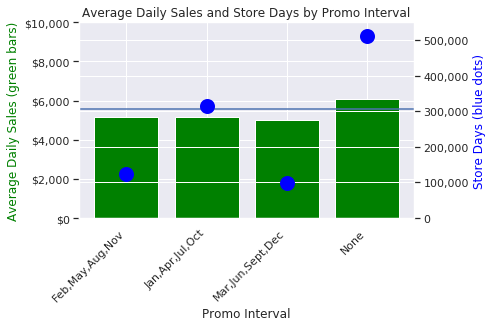

In [71]:
total_sales_by_promo_interval = \
    np.array(df[['promo_interval', 'sales']].groupby('promo_interval').sum()[['sales']]).reshape(-1)
store_counts_by_promo_interval = \
    np.array(df[['promo_interval', 'store']].groupby('promo_interval').count()[['store']]).reshape(-1)
avg_daily_sales_by_promo_interval = \
    total_sales_by_promo_interval / store_counts_by_promo_interval
xs = np.array((df[['promo_interval', 'sales']].groupby('promo_interval').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_promo_interval, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(xs, store_counts_by_promo_interval, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 550000])

ax_l.set_title('Average Daily Sales and Store Days by Promo Interval')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('Promo Interval')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(df.sales.mean());

In [ ]:
#open.loc[open.promo2 == 1, 'state'].unique()
#open = df[df.open == 1]
#len(open) # 844340
#promo2_states = open.loc[open.promo2 == 1, 'state'].unique()
#promo2 = open[open.state.apply(lambda x: x in list(promo2_states))].head()
#list(promo2_states)
#len(df[df.promo2 == 1]) #421047
#len(df[df.promo2 == 0]) #629283
#df.groupby('store')['promo2'].count().max() == 942
#sorted(open.loc[open.promo2 == 1, 'state'].unique()) #       ['BW', 'BY',          'HE', 'HH', 'NW', 'RP', 'SH', 'SN', 'ST', 'TH']
#sorted(open.loc[open.promo2 == 0, 'state'].unique()) # ['BE', 'BW', 'BY', 'HB,NI', 'HE', 'HH', 'NW', 'RP', 'SH', 'SN', 'ST', 'TH']

['BE', 'BW', 'BY', 'HB,NI', 'HE', 'HH', 'NW', 'RP', 'SH', 'SN', 'ST', 'TH']

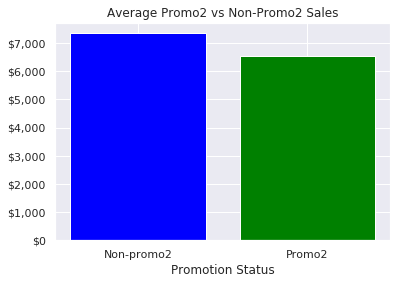

In [ ]:
# Promo2 vs non-promo2 sales by state
open = df[df.open == 1]

avg_promo2_sales = open.loc[open.promo2 == 1, 'sales'].mean()
avg_non_promo2_sales = open.loc[open.promo2 == 0, 'sales'].mean()

fig, ax = plt.subplots()

ax.bar(x=['Non-promo2', 'Promo2'],
       height=[avg_non_promo2_sales, avg_promo2_sales], color=['blue', 'green'])
ax_l.set_ylim([0, 10000])

ax.set_title('Average Promo2 vs Non-Promo2 Sales')
ax_l.set_ylabel('Avg Daily Sales')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('Promotion Status');

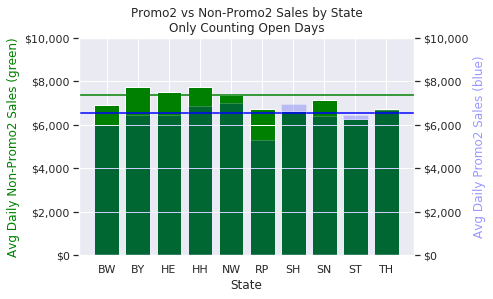

In [ ]:
# Promo2 vs non-promo2 sales by state
open = df[df.open == 1]
promo2_states_list = list(open.loc[open.promo2 == 1, 'state'].unique())

promo2_states = open[open.state.isin(promo2_states_list)]
non_promo2_sales_by_state = promo2_states.loc[(promo2_states.promo2 == 0), ['sales', 'state']].groupby('state').sum()
non_promo2_store_sales_days_by_state = \
    (promo2_states.loc[(promo2_states.promo2 == 0), ['store', 'state']].groupby('state').count().values).reshape(10,)
avg_daily_non_promo2_sales_by_state = (non_promo2_sales_by_state['sales'].values)/non_promo2_store_sales_days_by_state
avg_daily_non_promo2_sales = open.loc[df.promo2 == 0, 'sales'].mean()

promo2_sales_by_state = promo2_states.loc[promo2_states.promo2 == 1, ['sales', 'state']].groupby('state').sum()
promo2_store_sales_days_by_state = \
    (promo2_states.loc[promo2_states.promo2 == 1, ['store', 'state']].groupby('state').count().values).reshape(10,)
avg_daily_promo2_sales_by_state = promo2_sales_by_state['sales'].values/promo2_store_sales_days_by_state
avg_daily_promo2_sales = open.loc[df.promo2 == 1, 'sales'].mean()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=non_promo2_sales_by_state.index, height=avg_daily_non_promo2_sales_by_state, color='green')#, alpha=0.6)
ax_l.set_ylim([0, 10000])
ax_r.bar(x=promo2_sales_by_state.index, height=avg_daily_promo2_sales_by_state, color='blue', alpha=0.2)
          #color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 10000])

ax_l.set_title('Promo2 vs Non-Promo2 Sales by State\nOnly Counting Open Days')
ax_l.set_ylabel('Avg Daily Non-Promo2 Sales (green)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['${:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Avg Daily Promo2 Sales (blue)', color='blue', alpha=0.4)
ax_l.set_xlabel('State')
ax_r.axhline(avg_daily_non_promo2_sales, color='green', linestyle='-')
ax_l.axhline(avg_daily_promo2_sales, color='blue', linestyle='-');

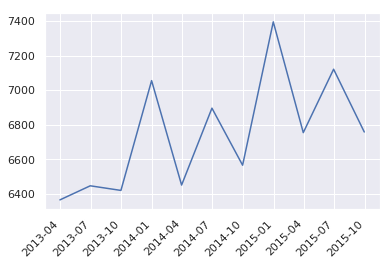

In [ ]:
df.promo_interval.unique()
#jan = open[open.promo_interval == 'Jan,Apr,Jul,Oct']
#plt.plot(jan.sales)
#di = df.copy()
#di['date'] = pd.to_datetime(di.date)
#di['week_start'] = pd.to_datetime(di.week_start)
#di.set_index(['date'], inplace=True)

jan = di[di.promo_interval == 'Jan,Apr,Jul,Oct']
jan = jan[jan.open == 1]
#plt.plot(jan.sales)
#plt.plot(jan.unstack('store').sales.sum())
fig, ax = plt.subplots()
ax.plot(jan.sales.resample('Q').mean())
fig.autofmt_xdate(rotation=45, ha='right')

In [ ]:
di.head()

,store,state,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,HE,8,6,3,6,3,1,93,80,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,56,HE,8,6,3,6,3,1,93,80,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,69,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,77,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,111,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


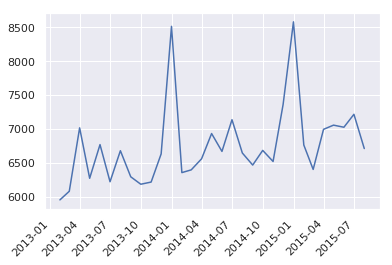

In [ ]:
jopen = di[di.open == 1]
jan = jopen.query('promo_interval == "Jan,Apr,Jul,Oct" & promo2_since_year <= 2012')
fig, ax = plt.subplots()
ax.plot(jan.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

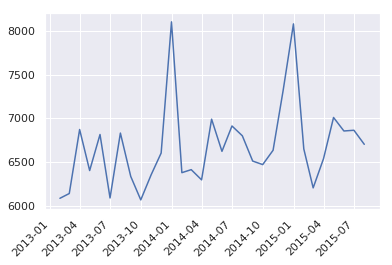

In [ ]:
jopen = di[di.open == 1]
feb = jopen.query('promo_interval == "Feb,May,Aug,Nov" & promo2_since_year <= 2012')
fig, ax = plt.subplots()
ax.plot(feb.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

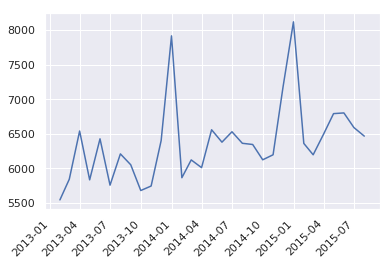

In [ ]:
jopen = di[di.open == 1]
mar = jopen.query('promo_interval == "Mar,Jun,Sept,Dec" & promo2_since_year <= 2012')
fig, ax = plt.subplots()
ax.plot(mar.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

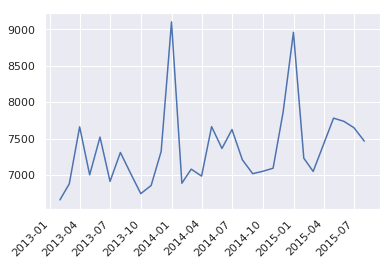

In [ ]:
jopen = di[di.open == 1]
none = jopen[jopen.promo_interval == 'None']
fig, ax = plt.subplots()
ax.plot(none.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

In [65]:
len(df[df.promo2 == 0]) # 629,283
len(df[df.promo2 == 0]) / 942

668.0286624203821

In [63]:
df[df.promo2 == 0].groupby('state').store.count() / 942

state
BE        92.000000
BW        30.085987
BY        76.967091
HB,NI     22.000000
HE        57.227176
HH        25.503185
NW       156.898089
RP        18.579618
SH        82.938429
SN        54.411890
ST        36.991507
TH        14.425690
Name: store, dtype: float64

In [61]:
df[df.promo2 == 1].groupby('state').store.count() / 942

state
BW     42.914013
BY    103.032909
HE     54.772824
HH      2.496815
NW    129.101911
RP     21.420382
SH     32.061571
SN     20.588110
ST     19.008493
TH     21.574310
Name: store, dtype: float64

In [56]:
autre = df[(df.promo2 == 0) & (df.open == 0)]
len(autre)/len(df)
df.groupby('state').store.count() / 942

state
BE        92.0
BW        73.0
BY       180.0
HB,NI     22.0
HE       112.0
HH        28.0
NW       286.0
RP        40.0
SH       115.0
SN        75.0
ST        56.0
TH        36.0
Name: store, dtype: float64

421047


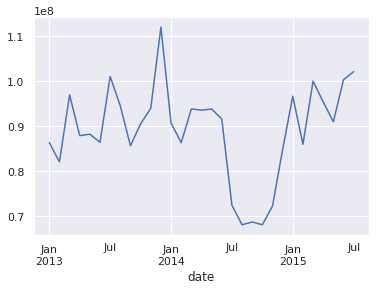

In [45]:
promo2 = di[(di.promo2 == 1) & (di.open == 1)].copy() # len=421,047
#promo2 = di[(di.promo2 == 1)].copy() # len=421,047
#promo2.groupby('date').sales.sum().plot()
#promo2.groupby('date').sales.resample('Q').sum().plot()
print(len(promo2))
promo2.sales.resample('M').sum().plot()

629283


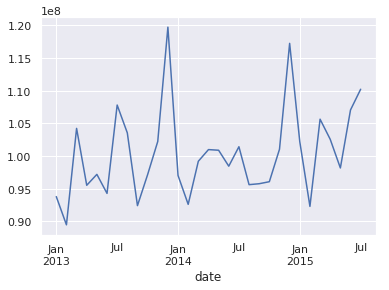

In [41]:
promo2 = di[di.promo2 == 0].copy()
print(len(promo2))
promo2.sales.resample('M').sum().plot()

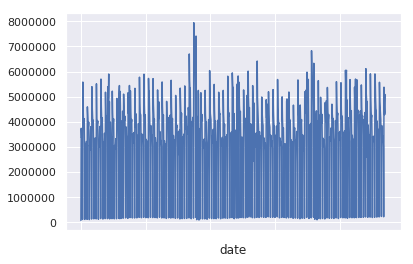

In [33]:
non_promo2 = df[df.promo2 == 0].copy()
non_promo2.groupby('date').sales.sum().plot()

In [ ]:
# The Promo2 sucks!
di['2014-05'].head()
jan.query('date.dt.month in [1,4,7,10]').sales.mean() # 6552
jan.query('date.dt.month not in [1,4,7,10]').sales.mean() # 6832
feb.query('date.dt.month in [2,5,8,11]').sales.mean() # 6556
feb.query('date.dt.month not in [2,5,8,11]').sales.mean() # 6695
mar.query('date.dt.month in [3,6,9,12]').sales.mean() # 6556
mar.query('date.dt.month not in [3,6,9,12]').sales.mean() # 6259

6259.501754712879

In [104]:
# The Promo2 sucks!
jopen = di[di.open == 1].copy()
jan = jopen.query('promo_interval == "Jan,Apr,Jul,Oct" & promo2_since_year <= 2012')
feb = jopen.query('promo_interval == "Feb,May,Aug,Nov" & promo2_since_year <= 2012')
mar = jopen.query('promo_interval == "Mar,Jun,Sept,Dec" & promo2_since_year <= 2012')
none = jopen[jopen.promo_interval == 'None']

jan.query('date.dt.month in [3,6,9,12]').sales.mean() # 7071
jan.query('date.dt.month not in [3,6,9,12]').sales.mean() # 6569
feb.query('date.dt.month in [1,4,7,10]').sales.mean() # 6611
feb.query('date.dt.month not in [1,4,7,10]').sales.mean() # 6675
mar.query('date.dt.month in [2,5,8,11]').sales.mean() # 6363
mar.query('date.dt.month not in [2,5,8,11]').sales.mean() # 6351
len(jan) # 157,824
len(feb) #  50,724
len(mar) #  47,436
len(none)# 423,293
len(jopen) #844,340

844340

In [97]:
# Promo2 stores got a lot better over time. Is it because they sucked to begin with or something else?
start_sales = di['2013-01-02'].sales
end_sales = di['2015-07-31'].sales
diff_pct = (end_sales - start_sales)/start_sales
(np.array(end_sales) - np.array(start_sales)).mean()/start_sales.mean() # .4547

promo2 = di[di.promo2 == 1]
start_sales_promo2 = promo2['2013-01-02'].sales
start_sales_count = len(promo2['2013-01-02'])
end_sales_promo2 = promo2['2015-07-31'].sales
end_sales_count = len(promo2['2015-07-31'])
diff_pct_promo2 = (end_sales - start_sales)/start_sales
(np.array(end_sales_promo2) - np.array(start_sales_promo2)).mean()/start_sales_promo2.mean() # .5665

jan = di[di.promo_interval == 'Jan,Apr,Jul,Oct']
start_sales_jan = jan['2013-01-02'].sales
start_sales_count = len(jan['2013-01-02'])
end_sales_jan = jan['2015-07-31'].sales
end_sales_count = len(jan['2015-07-31'])
diff_pct_jan = (end_sales - start_sales)/start_sales
(np.array(end_sales_jan) - np.array(start_sales_jan)).mean()/start_sales_jan.mean() # .5438

feb = di[di.promo_interval == 'Feb,May,Aug,Nov']
start_sales_feb = feb['2013-01-02'].sales
start_sales_count = len(feb['2013-01-02'])
end_sales_feb = feb['2015-07-31'].sales
end_sales_count = len(feb['2015-07-31'])
diff_pct_feb = (end_sales - start_sales)/start_sales
(np.array(end_sales_feb) - np.array(start_sales_feb)).mean()/start_sales_feb.mean() # .6878

mar = di[di.promo_interval == 'Mar,Jun,Sept,Dec']
start_sales_mar = mar['2013-01-02'].sales
start_sales_count = len(mar['2013-01-02'])
end_sales_mar = mar['2015-07-31'].sales
end_sales_count = len(mar['2015-07-31'])
diff_pct_mar = (end_sales - start_sales)/start_sales
(np.array(end_sales_mar) - np.array(start_sales_mar)).mean()/start_sales_mar.mean() # .4893
start_sales_mar_mth = mar['2013-01'].sales
start_sales_count_mth = len(mar['2013-01'])
end_sales_mar_mth = mar['2015-07'].sales
end_sales_count_mth = len(mar['2015-07'])
(np.array(end_sales_mar_mth) - np.array(start_sales_mar_mth)).mean()/start_sales_mar_mth.mean() # .2165

promo2 = di[di.promo2 == 0].copy()
#start_sales_promo2 = promo2['2013-01-02'].sales
#start_sales_non_count = len(promo2['2013-01-02'])
#end_sales_promo2 = promo2['2015-07-31'].sales
#end_sales_non_count = len(promo2['2015-07-31'])
#diff_pct_promo2 = (end_sales - start_sales)/start_sales
#(np.array(end_sales_promo2) - np.array(start_sales_promo2)).mean()/start_sales_promo2.mean() # .3588
start_sales_promo2_mth = promo2['2013-01'].sales.sum() / len(promo2['2013-01'])
#start_sales_non_count_mth = len(promo2['2013-01'])
end_sales_promo2_mth = promo2['2015-07'].sales.sum() / len(promo2['2015-07'])
#end_sales_non_count_mth = len(promo2['2015-07'])
((end_sales_promo2_mth) - (start_sales_promo2_mth)) /start_sales_promo2_mth # 0.2147

promo2 = di[di.promo2 == 1].copy()
start_sales_mth = promo2['2013-01'].sales.sum() / len(promo2['2013-01'])
end_sales_mth = promo2['2015-07'].sales.sum() / len(promo2['2015-07'])
(np.array(end_sales_mth) - np.array(start_sales_mth))/start_sales_mth

0.1331843403261296

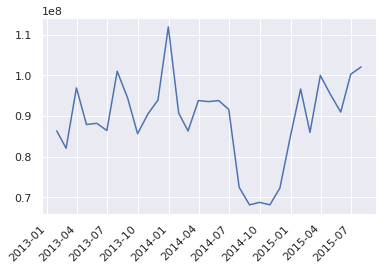

In [98]:
promo2 = di[di.promo2 == 1]
promo2_sales = promo2.groupby(promo2.index).sales.sum()
promo2_store_counts = promo2.groupby(promo2.index).store.count()
fig, ax = plt.subplots()
ax.plot(promo2_sales.resample('M').sum())
fig.autofmt_xdate(rotation=45, ha='right')

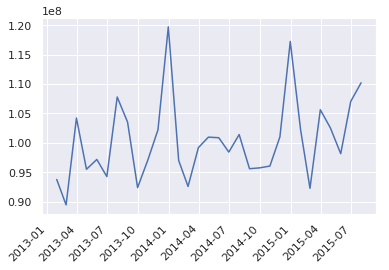

In [99]:
non_promo2 = di[di.promo2 == 0]
non_promo2_sales = non_promo2.groupby(non_promo2.index).sales.sum()
non_promo2_store_counts = non_promo2.groupby(non_promo2.index).store.count()
fig, ax = plt.subplots()
ax.plot(non_promo2_sales.resample('M').sum())
fig.autofmt_xdate(rotation=45, ha='right')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 43 columns):
store                           1050330 non-null int64
state                           1050330 non-null object
date                            1050330 non-null object
max_temperature_c               1050330 non-null int64
mean_temperature_c              1050330 non-null int64
min_temperature_c               1050330 non-null int64
dew_point_c                     1050330 non-null int64
mean_dew_point_c                1050330 non-null int64
min_dew_point_c                 1050330 non-null int64
max_humidity                    1050330 non-null int64
mean_humidity                   1050330 non-null int64
min_humidity                    1050330 non-null int64
max_sea_level_pressureh_pa      1050330 non-null int64
mean_sea_level_pressureh_pa     1050330 non-null int64
min_sea_level_pressureh_pa      1050330 non-null int64
max_visibility_km               1050330 non-null float64
mea

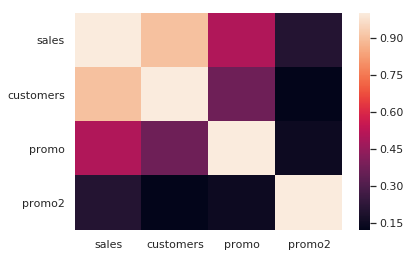

In [6]:
#sns.heatmap(di[['sales', 'customers', 'assortment', 'store_type']])
sns.heatmap(df[['sales', 'customers', 'promo', 'promo2']].corr())

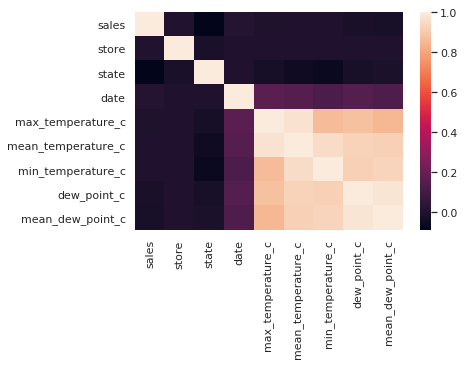

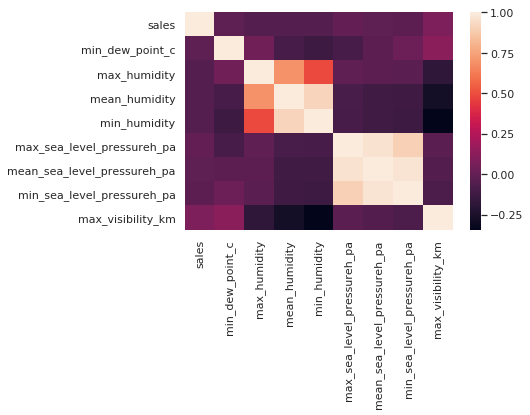

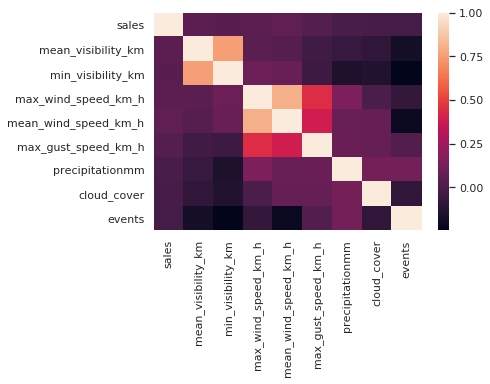

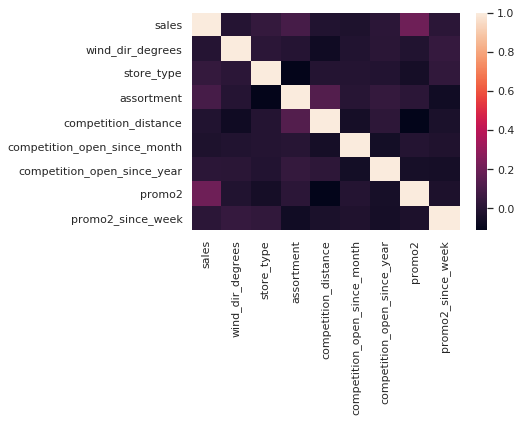

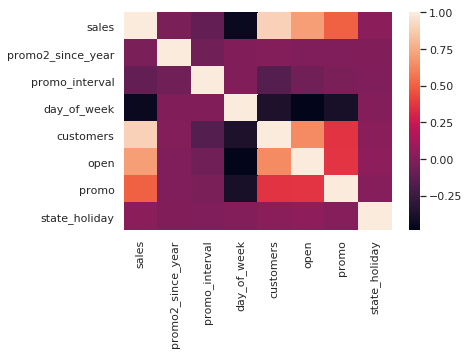

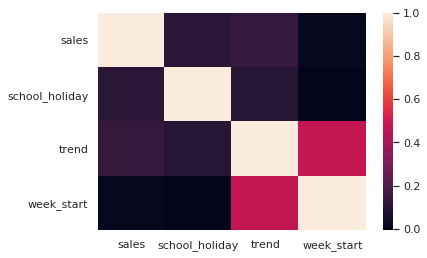

In [53]:
for_heatmap = df.copy()
for col in ['assortment', 'date', 'events', 'promo_interval', 'state', 'state_holiday', 'store_type', 'week_start']:
    for_heatmap[col] = pd.factorize(for_heatmap[col])[0]
num_cols = 8
for i in range(math.ceil(len(tester.columns)/num_cols)):
    temp_df = tester[['sales']].copy()
    for j in range(len(tester.columns)):
        if j // num_charts == i and j != 35:
            temp_df = temp_df.join(tester.iloc[:, j])
    sns.heatmap(temp_df.corr())
    plt.show()

In [74]:
corrs = for_heatmap.corr()
corrs['sales'].sort_values(ascending=False)

sales                           1.000000
customers                       0.900855
open                            0.704430
promo                           0.503123
promo2                          0.201789
trend                           0.132667
school_holiday                  0.103216
assortment                      0.094887
max_visibility_km               0.082983
mean_wind_speed_km_h            0.061571
max_wind_speed_km_h             0.051738
mean_visibility_km              0.050962
store_type                      0.042900
min_visibility_km               0.042883
state_holiday                   0.032229
max_gust_speed_km_h             0.030297
promo2_since_week               0.014353
competition_open_since_year     0.013752
date                            0.011703
week_start                      0.009891
store                           0.006779
max_sea_level_pressureh_pa     -0.000850
mean_temperature_c             -0.000982
min_temperature_c              -0.001029
wind_dir_degrees

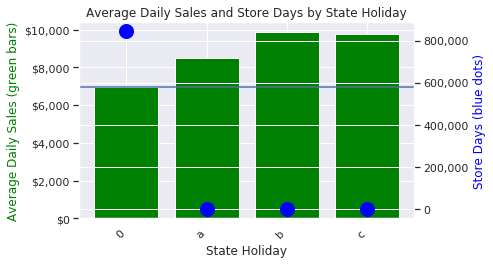

In [61]:
open = df[df.open == 1].copy()

total_sales_by_state_holiday = \
    np.array(open[['state_holiday', 'sales']].groupby('state_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_state_holiday = \
    np.array(open[['state_holiday', 'store']].groupby('state_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_state_holiday = \
    total_sales_by_state_holiday / store_counts_by_state_holiday
xs = np.array((open[['state_holiday', 'sales']].groupby('state_holiday').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_state_holiday, color='green')
ax_r.plot(xs, store_counts_by_state_holiday, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
#ax_r.set_ylim([0, 550000])

ax_l.set_title('Average Daily Sales and Store Days by State Holiday')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('State Holiday')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(open.sales.mean());

#len(open[open.state_holiday == 'a']) # 694
#len(open[open.state_holiday == 'b']) # 145
#len(open[open.state_holiday == 'c']) # 71
#len(open[open.state_holiday == '0']) # 843,430

In [67]:
open = df[df.open == 1].copy()
#len(open[open.school_holiday == 1]) # 163,445
#len(open[open.school_holiday == 0]) # 680,895

680895

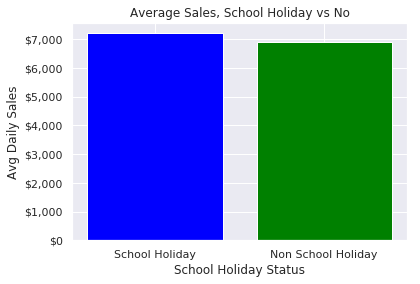

In [56]:
# School holiday vs no
open = df[df.open == 1].copy()

avg_sch_sales = open.loc[open.school_holiday == 1, 'sales'].mean()
avg_non_sch_sales = open.loc[open.school_holiday == 0, 'sales'].mean()

fig, ax = plt.subplots()

ax.bar(x=['School Holiday', 'Non School Holiday'],
       height=[avg_sch_sales, avg_non_sch_sales], color=['blue', 'green'])

ax.set_title('Average Sales, School Holiday vs No')
ax.set_ylabel('Avg Daily Sales')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('School Holiday Status');

#len(open[open.school_holiday == 1]) # 163,445
#len(open[open.school_holiday == 0]) # 680,895

In [72]:
# Don't use - the one above is fine

#open = df[df.open == 1].copy()

#total_sales_by_school_holiday = \
#    np.array(open[['school_holiday', 'sales']].groupby('school_holiday').sum()[['sales']]).reshape(-1)
#store_counts_by_school_holiday = \
#    np.array(open[['school_holiday', 'store']].groupby('school_holiday').count()[['store']]).reshape(-1)
#avg_daily_sales_by_school_holiday = \
#    total_sales_by_school_holiday / store_counts_by_school_holiday
#xs = np.array((open[['school_holiday', 'sales']].groupby('school_holiday').sum()).index)
#xs = ['School Holiday', 'Non School Holiday']

#fig, ax_l = plt.subplots()
#ax_r = ax_l.twinx()

#ax_l.bar(x=xs, height=avg_daily_sales_by_school_holiday, color='green')
#ax_r.plot(xs, store_counts_by_school_holiday, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
#ax_r.set_ylim([0, 550000])

#ax_l.set_title('Average Daily Sales and Store Days by School Holiday')
#ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
#ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
#ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
#ax_r.set_ylabel('Store Days (blue dots)', color='blue')
#ax_l.set_xlabel('School Holiday')
#fig.autofmt_xdate(rotation=45, ha='right')
#ax_l.axhline(open.sales.mean());

In [ ]:
#pd.plotting.scatter_matrix(df[['sales', 'store', 'date', 'open', 'promo', 'promo2', 'competition_distance']])